In [1]:
# Importing Packages
import pandas as pd
import numpy as np

In [2]:
# Loading Comma Seperated Data using read_table pandas function in 'spam_train' dataframe
spam_train = pd.read_table("spambasetrain.csv", sep=",", header=None)

# Adding Headers to Data
spam_train.columns = ["char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam_label"]
spam_train.to_csv("spambasetrain_wheader.csv")
spam_train

,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_label
0,0.000,0.316,0.000,0.000,0.000,0.000,1.125,2,9,0
1,0.000,0.735,0.000,0.735,0.000,0.000,2.571,10,18,0
2,0.000,0.105,0.000,0.000,0.158,0.000,1.494,10,139,1
3,0.000,0.299,0.000,0.000,0.000,0.199,2.465,28,106,1
4,0.000,0.000,0.000,0.817,0.000,0.000,1.857,15,39,0
5,0.000,0.000,0.000,2.272,0.000,0.000,1.750,7,14,0
6,0.055,0.334,0.000,0.055,0.000,0.055,1.685,6,59,0
7,0.000,0.162,0.000,0.000,0.000,0.000,2.643,34,193,0
8,0.000,0.075,0.000,0.613,0.532,0.137,7.300,763,2453,1
9,0.000,0.052,0.000,0.078,0.000,0.235,3.153,121,618,0


# Training

In [3]:
# Counting Total Labels
total_labels = spam_train["spam_label"].count()

print("Total Label Count:", total_labels)

Total Label Count: 2999


In [4]:
# Count Per Label
value_counts = spam_train["spam_label"].value_counts()
class0_count = value_counts[0]
class1_count = value_counts[1]

print("Class 0 Label Count:", class0_count)
print("Class 1 Label Count:", class1_count)

Class 0 Label Count: 1794
Class 1 Label Count: 1205


## Estimation of P(C): 
To estimate the P(C) values, just calculate the fraction of the training examples that are in class C. For example, to estimate P(C = 1) calculate:

\begin{equation*}
\frac{number of examplesin training file in Class 1}{total number of examples in training file}
\end{equation*}

In [5]:
# Estimation of P(C)
prob_spam = class1_count/total_labels
prob_not_spam = class0_count/total_labels

## 1. What was the estimated value of P(C) for C = 1?

In [6]:
print("P(Spam)=", prob_spam)

P(Spam)= 0.4018006002


## 2. What was the estimated value of P(C) for C = 0?

In [7]:
print("P(Not Spam)=", prob_not_spam)

P(Not Spam)= 0.5981993998


In [8]:
# Seperating Data According to Class Labels
class0 = spam_train[spam_train['spam_label']==0]
class1 = spam_train[spam_train['spam_label']==1]
del class0['spam_label']
del class1['spam_label']

## Estimation of parameters of Gaussian pdf

In [9]:
# Calculation of Class 0 Mean
class0_mean = class0.describe().T['mean']
print("Class 0 Mean Calculation:")
class0_mean

Class 0 Mean Calculation:


char_freq_;                     0.048426
char_freq_(                     0.157487
char_freq_[                     0.016960
char_freq_!                     0.110713
char_freq_$                     0.011503
char_freq_#                     0.025892
capital_run_length_average      2.376590
capital_run_length_longest     18.182274
capital_run_length_total      164.143255
Name: mean, dtype: float64

In [10]:
# Calculation of Class 1 Mean
class1_mean = class1.describe().T['mean']
print("Class 1 Mean Calculation:")
class1_mean

Class 1 Mean Calculation:


char_freq_;                     0.020247
char_freq_(                     0.103439
char_freq_[                     0.007847
char_freq_!                     0.491662
char_freq_$                     0.173151
char_freq_#                     0.084901
capital_run_length_average      9.496347
capital_run_length_longest     97.209129
capital_run_length_total      453.512863
Name: mean, dtype: float64

In [11]:
# Calculation of Variance according to the given formula in assignment
def cal_variance(column, mean, count):
    return (column.apply(lambda x: (x-mean)**2).sum())/(count-1)

class0_variance_list = []
class1_variance_list = []

for column in class0:
    class0_variance_list.append(cal_variance(class0[column], class0_mean[column], class0_count))
for column in class1:
    class1_variance_list.append(cal_variance(class1[column], class1_mean[column], class1_count))

In [12]:
# Calculation of Class 0 Variance
class0_variance = pd.Series(class0_variance_list, index=class0.columns)
print("Class 0 Variance Calculation:")
class0_variance

Class 0 Variance Calculation:


char_freq_;                        0.088306
char_freq_(                        0.070180
char_freq_[                        0.004845
char_freq_!                        0.417588
char_freq_$                        0.004080
char_freq_#                        0.089269
capital_run_length_average        37.447271
capital_run_length_longest      1915.266813
capital_run_length_total      144134.168535
dtype: float64

In [13]:
# Calculation of Class 1 Variance
class1_variance = pd.Series(class1_variance_list, index=class1.columns)
print("Class 1 Variance Calculation:")
class1_variance

Class 1 Variance Calculation:


char_freq_;                        0.007542
char_freq_(                        0.032143
char_freq_[                        0.002416
char_freq_!                        0.547792
char_freq_$                        0.129976
char_freq_#                        0.527283
capital_run_length_average      2965.984486
capital_run_length_longest     36369.991113
capital_run_length_total      614182.120474
dtype: float64

## 3. What were the estimated values for (mean, variance) for the Gaussian corresponding to attribute capital run length longest and class 1 (Spam).

In [14]:
print("Mean for capital run length longest and class 1=",class1_mean['capital_run_length_longest'])
print("Variance for capital run length longest and class 1=",class1_variance['capital_run_length_longest'])

Mean for capital run length longest and class 1= 97.2091286307
Variance for capital run length longest and class 1= 36369.9911126


## 4. What were the estimated values for (mean, variance) for the Gaussian corresponding to attribute char freq ; and Class 0.

In [15]:
print("Mean for char_freq_; and class 0=",class0_mean['char_freq_;'])
print("Variance for char_freq_; and class 0=",class0_variance['char_freq_;'])

Mean for char_freq_; and class 0= 0.0484258639911
Variance for char_freq_; and class 0= 0.0883056032571


In [16]:
# Gaussian PDF Formula
import math
def normpdf(x, mean, var):
    pi = 3.1415926
    denom = (2*pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

# Testing

In [17]:
# Loading Comma Seperated Data using read_table pandas function in 'spam_test' dataframe
spam_test = pd.read_table("spambasetest.csv", sep=",", header=None)

# Adding Headers to Data
spam_test.columns = ["char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "spam_label"]
spam_test

,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_label
0,0.000,0.000,0.000,0.000,0.000,0.000,2.000,4,6,0
1,0.000,0.000,0.000,0.102,0.000,0.000,2.531,30,81,0
2,0.000,0.492,0.000,0.000,0.000,0.000,1.890,11,138,0
3,0.203,0.195,0.050,0.000,0.014,0.000,2.880,45,1080,0
4,0.000,0.000,0.000,0.874,0.000,0.000,5.114,107,179,1
5,0.000,0.793,0.000,0.000,0.000,0.000,3.076,11,40,0
6,0.000,0.000,0.000,0.170,0.170,0.000,6.266,41,94,1
7,0.000,0.132,0.000,0.022,0.000,0.000,2.621,70,422,0
8,0.000,0.000,0.000,0.000,0.000,0.000,1.551,10,45,0
9,0.000,0.000,0.000,0.277,0.000,0.000,3.000,17,51,0


In [19]:
# Predictions for Test Dataset
import math
import xlwt

workbook = xlwt.Workbook()  
sheet = workbook.add_sheet("programanswers")

i = 0
correct_count =0
answer_list = []

if prob_not_spam > prob_spam:
    zero_r_label = 0
else:
    zero_r_label = 1

c_label =0    
for index, row in spam_test.iterrows():
      # Taking Natural Log for P(C)
      pr0 =  math.log(prob_not_spam) 
      pr1 =  math.log(prob_spam)
     
      for column in spam_test:
           # Not counting "spam_label" while doing Predictions!
           if (column!="spam_label"):
               #print(row[column])
               pr0 += math.log(normpdf(row[column],class0_mean[column],class0_variance[column]))
               #print(pr0)
               pr1 += math.log(normpdf(row[column],class1_mean[column],class1_variance[column]))
               #print(pr1)
    
      print("P(X|C=0) = ",pr0)  
      print("P(X|C=1) = ",pr1)
    
      # Label the example with the class achieving the maximum value for this expression. If there is a tie, give the example the label 1.
      if (pr0 > pr1):
           class_label = 0
      else:
           class_label = 1 
      print("class_label is : ",class_label)
      answer_list.append(class_label)
      #print(class_label)
      
      if (row["spam_label"] == zero_r_label):
        c_label += 1
    
      # Comparing results with actual predictions
      if  row["spam_label"] == class_label:
        result= "Match"
        correct_count = correct_count+1
      else:
        result="No match"
      sheet.write(i, 0,row["spam_label"] ) 
      sheet.write(i, 1,class_label) 
      sheet.write(i, 2,result) 
      i=i+1
        
         
workbook.save("output.xls")
print("\nNo. of Correct Predictions = ", correct_count)

P(X|C=0) =  -11.107084331454885
P(X|C=1) =  -17.119278957199707
class_label is :  0
P(X|C=0) =  -11.012097539615262
P(X|C=1) =  -16.92852455575198
class_label is :  0
P(X|C=0) =  -11.605452996414062
P(X|C=1) =  -19.202399754584867
class_label is :  0
P(X|C=0) =  -14.08967563178135
P(X|C=1) =  -19.67965875296875
class_label is :  0
P(X|C=0) =  -13.809050119823386
P(X|C=1) =  -16.80602092429702
class_label is :  0
P(X|C=0) =  -13.740129786985928
P(X|C=1) =  -24.305689971175273
class_label is :  0
P(X|C=0) =  -14.372713740246251
P(X|C=1) =  -16.73624800106599
class_label is :  0
P(X|C=0) =  -11.72101383805511
P(X|C=1) =  -16.673235030291153
class_label is :  0
P(X|C=0) =  -11.041746286081368
P(X|C=1) =  -17.07838743429091
class_label is :  0
P(X|C=0) =  -11.034318993466666
P(X|C=1) =  -16.876204842153328
class_label is :  0
P(X|C=0) =  -12.114504750694381
P(X|C=1) =  -16.756681312976575
class_label is :  0
P(X|C=0) =  -10.913798633871322
P(X|C=1) =  -17.083732698634456
class_label is :  0

In [20]:
# Predictions from Created Modelling Library
answer_list = np.array(answer_list)
print(answer_list)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]


## 5. Which classes were predicted for the first 5 examples in the test set?

In [21]:
print(answer_list[0:5])

[0 0 0 0 0]


## 6. Which classes were predicted for the last 5 examples in the test set?

In [22]:
print(answer_list[195:200])

[0 0 0 0 0]


## 7. What was the percentage error on the examples in the test file?

In [23]:
total_test_labels = spam_test['spam_label'].count()
print("\nNo. of Incorrect Predictions = ", total_test_labels - correct_count)
percentage_error = (1 - (correct_count/total_test_labels))*100
print("\nPrecentage Error = ",percentage_error)


No. of Incorrect Predictions =  40

Precentage Error =  20.0


# Using Zero-R Classifier Methodology

## 8. Performance Evaluation using Zero-R Classifier

In [24]:
print("\nzero_r_label = ",zero_r_label)
print("\nMaximized Class Correct Predictions = ",c_label)
zero_r_accuracy = c_label/total_test_labels
print ("\nZero-R Classifier Accuracy = ",zero_r_accuracy )


zero_r_label =  0

Maximized Class Correct Predictions =  118

Zero-R Classifier Accuracy =  0.59


The accuracy of Zero-R Classifier is ~59% which is low as compared to performance of Naive-Bayes Classifier.

In [90]:
# Loading Comma Seperated Data using read_table pandas function in 'spam_train' dataframe
spam_train = pd.read_table("spambasetrain.csv", sep=",", header=None)

# Adding Headers to Data
spam_train.columns = ["char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "char_freq_#", "capital_run_length_longest", "capital_run_length_total", "spam_label"]
del spam_train["spam_label"]

In [91]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# normality test
def normal_test(x):
    stat, p = shapiro(x)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

for column in spam_train:
    normal_test(spam_train[column])

Statistics=0.131, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.549, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.217, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.352, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.309, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.047, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.047, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.340, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.429, p=0.000
Sample does not look Gaussian (reject H0)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1326: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [92]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# generate univariate observations
def normal_test(x):
    # normality test
    stat, p = normaltest(spam_train["char_freq_;"])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

for column in spam_train:
    normal_test(spam_train[column])

Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=5582.490, p=0.000
Sample does not look Gaussian (reject H0)


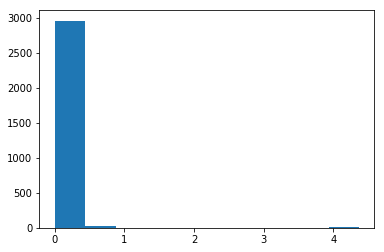

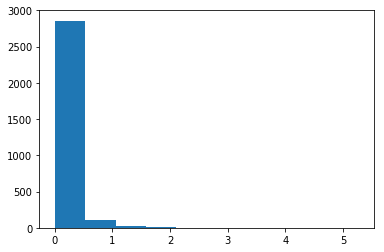

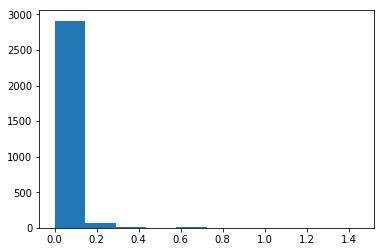

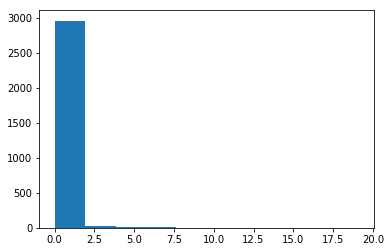

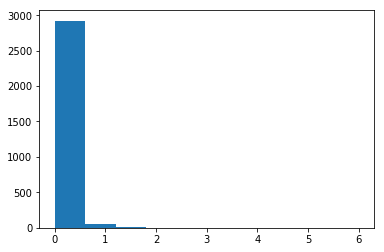

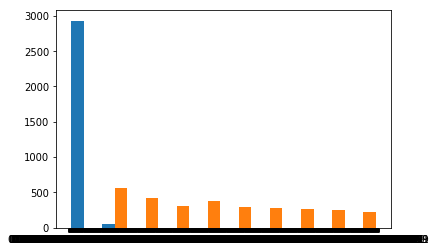

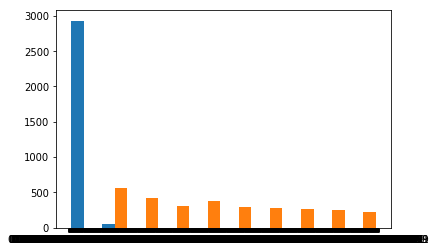

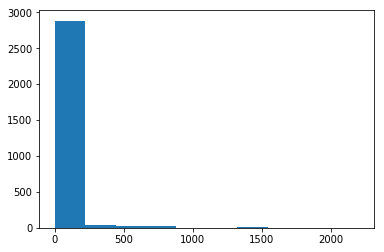

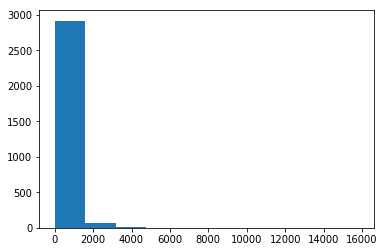

In [95]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

def gaussian_plot(x):
    # histogram plot
    pyplot.hist(x)
    pyplot.show()
    
for column in spam_train:
    gaussian_plot(spam_train[column])

In [81]:
# Loading Comma Seperated Data using read_table pandas function in 'spam_train' dataframe
spam_train = pd.read_table("spambasetrain.csv", sep=",", header=None)

# Adding Headers to Data
spam_train.columns = ["char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "char_freq_#", "capital_run_length_longest", "capital_run_length_total", "spam_label"]

In [82]:
from scipy import stats

stats.chi2_contingency(spam_train)

(303816.93147456675,
 0.0,
 26982,
 array([[  1.37153442e-03,   5.01873328e-03,   4.91575172e-04, ...,
           1.84585356e+00,   1.03654052e+01,   1.48525170e-02],
        [  3.53229920e-03,   1.29254267e-02,   1.26602042e-03, ...,
           4.75387780e+00,   2.66954383e+01,   3.82517078e-02],
        [  1.67301623e-02,   6.12191871e-02,   5.99630041e-03, ...,
           2.25159712e+01,   1.26438614e+02,   1.81173010e-01],
        ..., 
        [  1.28642675e-02,   4.70730638e-02,   4.61071512e-03, ...,
           1.73131301e+01,   9.72220186e+01,   1.39308754e-01],
        [  8.72276488e-03,   3.19184337e-02,   3.12634855e-03, ...,
           1.17393675e+01,   6.59225108e+01,   9.44599069e-02],
        [  1.75038484e-02,   6.40502674e-02,   6.27359923e-03, ...,
           2.35572219e+01,   1.32285766e+02,   1.89551353e-01]]))

In [84]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(spam_train)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
303816.931475


===Degrees of Freedom===
26982


===P-Value===
0.0


===Contingency Table===
[[  1.37153442e-03   5.01873328e-03   4.91575172e-04 ...,   1.84585356e+00
    1.03654052e+01   1.48525170e-02]
 [  3.53229920e-03   1.29254267e-02   1.26602042e-03 ...,   4.75387780e+00
    2.66954383e+01   3.82517078e-02]
 [  1.67301623e-02   6.12191871e-02   5.99630041e-03 ...,   2.25159712e+01
    1.26438614e+02   1.81173010e-01]
 ..., 
 [  1.28642675e-02   4.70730638e-02   4.61071512e-03 ...,   1.73131301e+01
    9.72220186e+01   1.39308754e-01]
 [  8.72276488e-03   3.19184337e-02   3.12634855e-03 ...,   1.17393675e+01
    6.59225108e+01   9.44599069e-02]
 [  1.75038484e-02   6.40502674e-02   6.27359923e-03 ...,   2.35572219e+01
    1.32285766e+02   1.89551353e-01]]
